Первые 5 строк данных:
   Number    City Gender  Age   Income Illness
0       1  Dallas   Male   41  40367.0      No
1       2  Dallas   Male   54  45084.0      No
2       3  Dallas   Male   42  52483.0      No
3       4  Dallas   Male   40  40941.0      No
4       5  Dallas   Male   46  50289.0      No

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Number   150000 non-null  int64  
 1   City     150000 non-null  object 
 2   Gender   150000 non-null  object 
 3   Age      150000 non-null  int64  
 4   Income   150000 non-null  float64
 5   Illness  150000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB
None

Описательная статистика:
              Number            Age         Income
count  150000.000000  150000.000000  150000.000000
mean    75000.500000      44.950200   91252.798273
std  

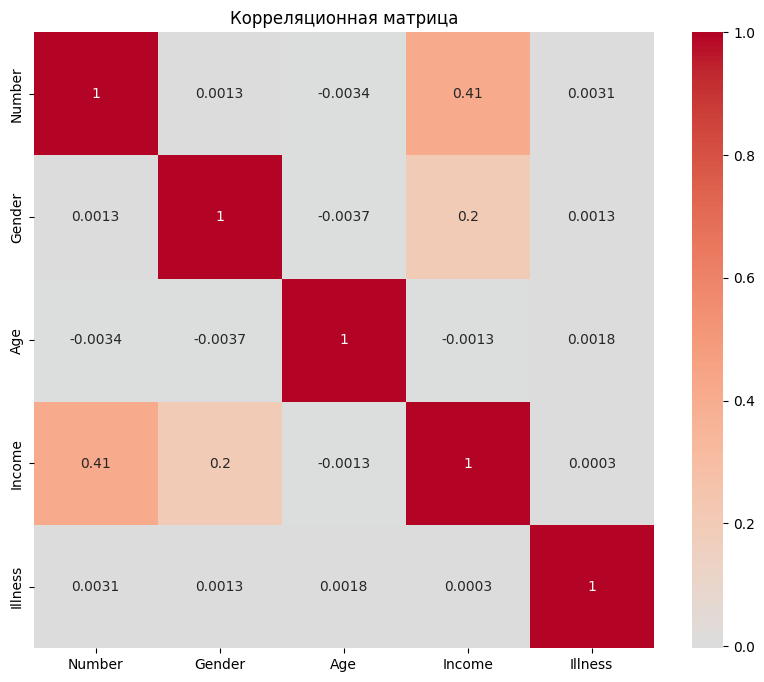

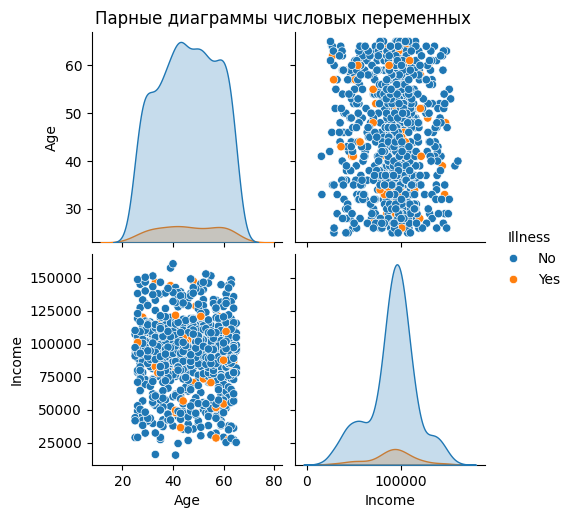

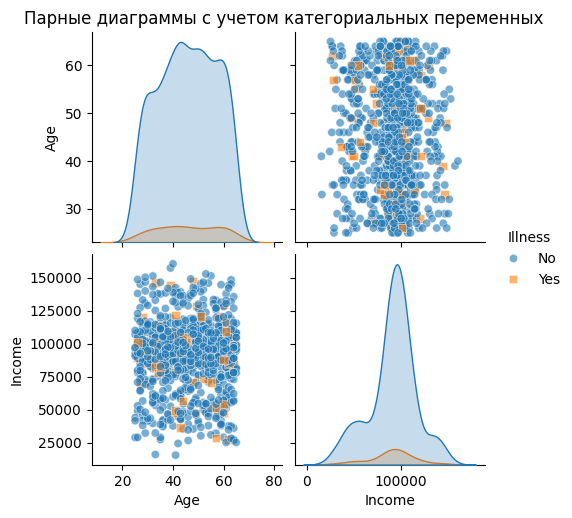

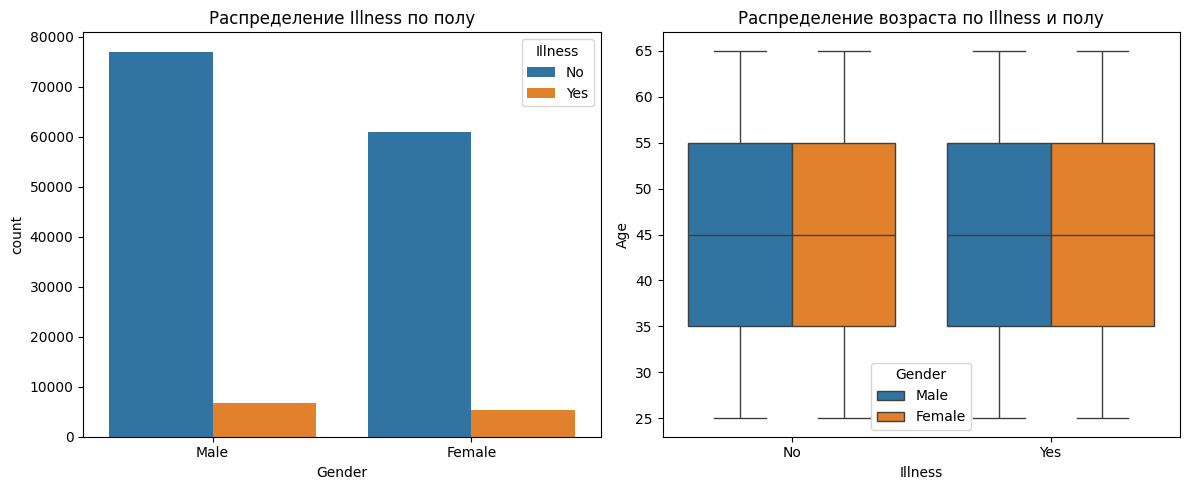

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('toy_dataset.csv')

print("Первые 5 строк данных:")
print(data.head())
print("\nИнформация о данных:")
print(data.info())
print("\nОписательная статистика:")
print(data.describe())

print("\nКоличество пропусков в каждом столбце:")
print(data.isnull().sum())

data_cleaned = data.dropna()
if len(data) != len(data_cleaned):
    print(f"\nУдалено {len(data) - len(data_cleaned)} строк с пропусками")

data_numeric = data_cleaned.copy()
data_numeric['Gender'] = data_numeric['Gender'].map({'Male': 1, 'Female': 0})
data_numeric['Illness'] = data_numeric['Illness'].map({'Yes': 1, 'No': 0})

correlation_matrix = data_numeric.corr(numeric_only=True)
print("\nМатрица корреляций:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица')
plt.show()

if len(data_cleaned) > 1000:
    sample_data = data_cleaned.sample(1000)
else:
    sample_data = data_cleaned

numerical_columns = ['Age', 'Income']
sns.pairplot(sample_data[numerical_columns + ['Illness']], hue='Illness', diag_kind='kde')
plt.suptitle('Парные диаграммы числовых переменных', y=1.02)
plt.show()

sns.pairplot(sample_data[numerical_columns + ['Gender', 'Illness']], 
             hue='Illness', 
             diag_kind='kde',
             markers=['o', 's'],
             plot_kws={'alpha': 0.6})
plt.suptitle('Парные диаграммы с учетом категориальных переменных', y=1.02)
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=data_cleaned, x='Gender', hue='Illness')
plt.title('Распределение Illness по полу')

plt.subplot(1, 2, 2)
sns.boxplot(data=data_cleaned, x='Illness', y='Age', hue='Gender')
plt.title('Распределение возраста по Illness и полу')
plt.tight_layout()
plt.show()